1. time interver
2. running time decrease
3. all ais data preprocessing

# Route Prediction

In [25]:
from pygradu import shortest_path
from pygradu import gridify
import shapely.geometry
import pandas as pd
import numpy as np
import importlib

grid = gridify.area_to_grid(side_length=5000)

Original NE: POINT (134 40)
Original SW: POINT (123 32)
Transformed NE: (798015.8733194428, 745576.647904759)
Transformed SW: (-178108.15701596113, -158644.45983528974)
col_count 195
row_count 180
grid_size 35100


/home/kura8165/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/home/kura8165/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [26]:
importlib.reload(gridify)

grid_2500m = gridify.area_to_grid(side_length=5000)
grid_5km = gridify.area_to_grid(side_length=10000)

MODELS_DIR = 'data/models/'
DATASET_DIR = 'data/datasets/'

graph_df_adj_2500m = pd.read_csv(MODELS_DIR + 'complete_5km.csv')[['original', 'connected', 'cost']]
graph_df_ship_2500m = pd.read_csv(MODELS_DIR + 'complete_5km.csv')[['original', 'connected', 'cost']]

graph_df_adj_5km = pd.read_csv(MODELS_DIR + 'complete_10km.csv')[['original', 'connected', 'cost']]
graph_df_ship_5km = pd.read_csv(MODELS_DIR + 'complete_10km.csv')[['original', 'connected', 'cost']]

graph_df_adj_5km.head()

Original NE: POINT (134 40)
Original SW: POINT (123 32)
Transformed NE: (798015.8733194428, 745576.647904759)
Transformed SW: (-178108.15701596113, -158644.45983528974)
col_count 195
row_count 180
grid_size 35100
Original NE: POINT (134 40)
Original SW: POINT (123 32)
Transformed NE: (798015.8733194428, 745576.647904759)
Transformed SW: (-178108.15701596113, -158644.45983528974)
col_count 97
row_count 90
grid_size 8730


/home/kura8165/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/home/kura8165/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/home/kura8165/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.

,original,connected,cost
0,0,1,1.0
1,0,90,1.0
2,0,91,1.0
3,1,0,1.0
4,1,2,1.0


In [27]:
importlib.reload(shortest_path)

%time graph_adj_2500m = shortest_path.df_to_graph(graph_df_adj_2500m)
%time graph_ship_2500m = shortest_path.df_to_graph(graph_df_ship_2500m)

%time graph_adj_5km = shortest_path.df_to_graph(graph_df_adj_5km)
%time graph_ship_5km = shortest_path.df_to_graph(graph_df_ship_5km)

CPU times: user 202 ms, sys: 16.3 ms, total: 218 ms
Wall time: 217 ms
CPU times: user 349 ms, sys: 7.81 ms, total: 357 ms
Wall time: 356 ms
CPU times: user 43 ms, sys: 3.86 ms, total: 46.9 ms
Wall time: 46.7 ms
CPU times: user 45.1 ms, sys: 0 ns, total: 45.1 ms
Wall time: 44.9 ms


In [28]:
# Convert speed model to dict

speed_model_2500m = pd.read_csv(MODELS_DIR + 'speed_5km.csv', index_col=0).to_dict()
speed_model_2500m = {int(k):v for k,v in speed_model_2500m.items()}

speed_model_5km = pd.read_csv(MODELS_DIR + 'speed_10km.csv', index_col=0).to_dict()
speed_model_5km = {int(k):v for k,v in speed_model_5km.items()}
speed_model_5km

{557: {0.0: 17.400000000000002,
  30.0: 18.6,
  52.0: 15.2,
  70.0: 2.1,
  90.0: 18.5,
  99.0: 18.5,
  31.0: nan,
  60.0: nan,
  73.0: nan,
  80.0: nan,
  155.0: nan,
  20.0: nan,
  32.0: nan,
  37.0: nan,
  40.0: nan,
  50.0: nan,
  51.0: nan,
  54.0: nan,
  55.0: nan,
  56.0: nan,
  71.0: nan,
  72.0: nan,
  75.0: nan,
  79.0: nan,
  81.0: nan,
  82.0: nan,
  83.0: nan,
  89.0: nan,
  140.0: nan,
  151.0: nan,
  185.0: nan,
  196.0: nan,
  204.0: nan,
  215.0: nan,
  200.0: nan,
  33.0: nan,
  220.0: nan,
  77.0: nan},
 558: {0.0: 7.040000000000001,
  30.0: 9.0,
  52.0: nan,
  70.0: nan,
  90.0: nan,
  99.0: nan,
  31.0: 1.9,
  60.0: nan,
  73.0: nan,
  80.0: nan,
  155.0: nan,
  20.0: nan,
  32.0: nan,
  37.0: nan,
  40.0: nan,
  50.0: nan,
  51.0: nan,
  54.0: nan,
  55.0: nan,
  56.0: nan,
  71.0: nan,
  72.0: nan,
  75.0: nan,
  79.0: nan,
  81.0: nan,
  82.0: nan,
  83.0: nan,
  89.0: nan,
  140.0: nan,
  151.0: nan,
  185.0: nan,
  196.0: nan,
  204.0: nan,
  215.0: nan,
  200.

In [29]:
# Load test set
# Need modify

test_voyages = pd.read_csv(DATASET_DIR + 'summer_ais_test_atad2.csv', index_col=0, parse_dates = ['timestamp', 'ata', 'atd'])
test_voyages.head()

,mmsi,timestamp,lat,lon,speed,course,heading,turnrate,breath,vessel_type,vessel_max_speed,draft,power,dwt,iceclass,ata,atd,end_lat,end_lon
0,440033510,2020-07-01 00:00:00,34.764795,127.489778,0.0,14.0,511,0,4.0,0,16,2.0,10000,36.0,IA,2020-07-01 18:49:25,2020-07-01,34.764807,127.489773
1,440033510,2020-07-01 00:00:10,34.764795,127.489780,0.0,14.0,511,0,4.0,0,16,2.0,10000,36.0,IA,2020-07-01 18:49:25,2020-07-01,34.764807,127.489773
2,440033510,2020-07-01 00:00:20,34.764798,127.489778,0.1,14.0,511,0,4.0,0,16,2.0,10000,36.0,IA,2020-07-01 18:49:25,2020-07-01,34.764807,127.489773
3,440033510,2020-07-01 00:00:40,34.764795,127.489777,0.1,14.0,511,0,4.0,0,16,2.0,10000,36.0,IA,2020-07-01 18:49:25,2020-07-01,34.764807,127.489773
4,440033510,2020-07-01 00:00:51,34.764793,127.489777,0.1,14.0,511,0,4.0,0,16,2.0,10000,36.0,IA,2020-07-01 18:49:25,2020-07-01,34.764807,127.489773


In [30]:
# Load shallow water

shallow_graph_2500m = set(pd.read_csv(MODELS_DIR + 'sea_5km_model.csv', index_col=0).original.values)
shallow_graph_5km = set(pd.read_csv(MODELS_DIR + 'sea_10km_model.csv', index_col=0).original.values)

#### Functions for debugging and visualizing the prediction results

In [31]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline 
from mpl_toolkits.basemap import Basemap  # import Basemap matplotlib toolkit
from shapely.geometry import Polygon
plt.rcParams.update({'font.size': 40})
import matplotlib as mpl

mmsi = 800054328
def plot_result(traffic_model_lats, traffic_model_lons, routes, areas, test_voyages, title, area_marker_size=10, use_start_time=True, area_std=0.2):
    mpl.rcParams['savefig.pad_inches'] = 0
    fig, ax = plt.subplots(figsize=(50,50))
    plt.title(title)
    plt.autoscale(tight=True)
        
    print("draw basemap...")
    m = Basemap(llcrnrlon = test_voyages.lon.min(),
                llcrnrlat = test_voyages.lat.min(), 
                urcrnrlon = test_voyages.lon.max(), 
                urcrnrlat = test_voyages.lat.max(),
                resolution='l')
    m.shadedrelief()
    
    plt.plot(traffic_model_lons, traffic_model_lats, 'o', c='blue', alpha=1, markersize=area_marker_size)
    
    newLabels, newHandles = [], []
    routes_groupped = routes.groupby('mmsi')
    
    print("predict route...")
    route_all = pd.DataFrame()
    for mmsi, route in routes_groupped:
        route_all = pd.concat([route_all, route])
        
        xy = areas[areas.voyage == mmsi].loc[:, ('lat', 'lon')]
        plt.plot(xy.loc[:, ('lon')], xy.loc[:, ('lat')], 'o', c='orange', alpha=0.2, markersize=area_marker_size, label='Search Area')
        
        if use_start_time:
            xy = test_voyages[(test_voyages.timestamp >= start_time) & (test_voyages.mmsi == mmsi)].loc[:, ('lat', 'lon')]
        else:
            xy = test_voyages[(test_voyages.mmsi == mmsi)].loc[:, ('lat', 'lon')]
        plt.plot(xy.loc[:, ('lon')], xy.loc[:, ('lat')], c='firebrick', alpha=1, markersize=7, linewidth=7, label='Actual')
        
        xy = route.loc[:, ('lat', 'lon')]
        plt.plot(xy.loc[:, ('lon')], xy.loc[:, ('lat')], c='darkturquoise', alpha=1, markersize=7, linewidth=7, label='Predicted')
        
        x_y_curve1 = route.loc[:, ('lon', 'lat')].values
        x_y_curve2 = test_voyages[(test_voyages.mmsi == mmsi)].loc[:, ('lon', 'lat')].values #these are your points for curve 2 (I just put some random numbers)
        
        handles, labels = plt.gca().get_legend_handles_labels()
        for handle, label in zip(handles, labels):
            if label not in newLabels:
                newLabels.append(label)
                newHandles.append(handle)
                
    print("done.")
                
    plt.legend(newHandles, newLabels)
    plt.savefig('pictures/' + (title).replace(':', '') + '.png',  
                bbox_inches = 'tight',
                pad_inches = 0)
    plt.show()

### Predict routes

In [32]:
importlib.reload(shortest_path)

start_time = '2020-07-01 00:00:00'
%time test = shortest_path.get_observations_at_time(test_voyages, start_time)
#print(len(test.mmsi))
summer_test_voyages = []

# Get the first observation on each voyage for prediction of the whole route
for i, obs in test.iterrows():
    summer_test_voyages.append(test_voyages.loc[(test_voyages.mmsi == obs.mmsi) & (test_voyages.timestamp == obs.atd)].iloc[0])
summer_test_voyages = pd.DataFrame(data=summer_test_voyages, columns = test.columns)
summer_test_voyages.head()

/home/kura8165/marine-traffic-modelling-master/pygradu/shortest_path.py:449: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row.course = course


CPU times: user 7.48 s, sys: 614 ms, total: 8.09 s
Wall time: 8.03 s


,mmsi,timestamp,lat,lon,speed,course,heading,turnrate,breath,vessel_type,vessel_max_speed,draft,power,dwt,iceclass,ata,atd,end_lat,end_lon
13300089,100900008,2020-07-01 00:02:43,37.524850,130.921217,0.3,-1,511,0,11.0,30,16,0.0,10000,396.0,IA,2020-07-01 15:37:53,2020-07-01 00:02:43,34.764803,127.489782
1726716,100908563,2020-07-01 00:00:01,37.524283,130.920217,0.0,-1,110,0,6.0,52,16,0.0,10000,104.0,IA,2020-07-01 05:50:37,2020-07-01 00:00:01,34.764788,127.489788
12134726,123456789,2020-07-01 00:00:34,37.468385,126.599957,0.4,-1,511,0,7.0,30,16,0.0,10000,396.0,IA,2020-07-01 23:59:56,2020-07-01 00:00:34,34.737695,127.805207
13838638,201915888,2020-07-01 00:58:05,37.697247,125.679233,1.9,-1,511,0,8.0,70,16,0.0,10000,252.0,IA,2020-07-01 00:58:06,2020-07-01 00:58:05,34.764795,127.489780
8121913,209241000,2020-07-01 00:00:07,37.204983,124.791000,12.6,-1,296,0,40.0,70,16,14.0,10000,75042.0,IA,2020-07-01 01:15:07,2020-07-01 00:00:07,34.764793,127.489787


In [33]:
routes_and_areas = shortest_path.predict_routes(summer_test_voyages.tail(5), grid_5km, graph_adj_5km, speed_model_5km, [], shallow_graph_5km)

use_dirways= False
use_turn_penalty= False
use_shallow_penalty= False
side_length: 10000
Error count= 0
[]


In [34]:
# Predicting routes using the adjacent model 5km
importlib.reload(shortest_path)

graph_adj_5km.use_turn_penalty = False
graph_adj_5km.use_shallow_penalty = True
graph_adj_5km.use_dirways = False

%time routes_and_areas = shortest_path.predict_routes(summer_test_voyages.tail(5), grid_5km, graph_adj_5km, speed_model_5km, [], shallow_graph_5km)
routes_adjacent_5km = pd.DataFrame(data=routes_and_areas[0], columns=['lat', 'lon', 'node', 'speed', 'mmsi', 'voyage', 'start_time', 'number'])
areas_adjacent_5km = pd.DataFrame(data=routes_and_areas[1], columns=['lat', 'lon', 'voyage','g', 'h', 'f'])

use_dirways= False
use_turn_penalty= False
use_shallow_penalty= True
side_length: 10000
Error count= 0
[]
CPU times: user 1min 35s, sys: 5.07 s, total: 1min 40s
Wall time: 1min 40s


In [35]:
routes_adjacent_5km

,lat,lon,node,speed,mmsi,voyage,start_time,number
0,35.373427,125.566805,3264.0,7.300000,671759000,671759000,2020-07-01 00:00:04,0
1,35.305825,125.580795,3174.0,9.816842,671759000,671759000,2020-07-01 00:00:04,1
2,35.214278,125.582391,3084.0,9.858823,671759000,671759000,2020-07-01 00:00:04,2
3,35.122730,125.583979,2994.0,9.310723,671759000,671759000,2020-07-01 00:00:04,3
4,35.031181,125.585560,2904.0,8.687711,671759000,671759000,2020-07-01 00:00:04,4
...,...,...,...,...,...,...,...,...
200,34.578047,127.920378,2475.0,10.626966,800054328,800054328,2020-07-01 00:01:31,55
201,34.578833,127.809573,2474.0,10.978862,800054328,800054328,2020-07-01 00:01:31,56
202,34.579517,127.698764,2473.0,9.150833,800054328,800054328,2020-07-01 00:01:31,57
203,34.671681,127.588598,2562.0,8.326199,800054328,800054328,2020-07-01 00:01:31,58


In [36]:
areas_adjacent_5km

,lat,lon,voyage,g,h,f
0,32.556252,125.409202,671759000,15.987279,33.112698,15.987279
1,32.557575,125.517428,671759000,15.588269,32.698485,15.588269
2,32.558805,125.625660,671759000,15.588269,32.284271,15.588269
3,32.559942,125.733899,671759000,15.588269,31.870058,15.588269
4,32.560986,125.842144,671759000,15.987986,31.455844,15.987986
...,...,...,...,...,...,...
7356,39.822315,133.091176,800054328,26.398587,76.468037,26.398587
7357,39.816032,133.209250,800054328,26.398587,76.882251,26.398587
7358,39.991680,122.632011,800054328,26.398587,74.982756,26.398587
7359,39.996101,122.750734,800054328,26.398587,74.568542,26.398587


In [37]:
nodes = pd.read_csv('data/models/traffic_5km_model2_to_lats_lons.csv')
traffic_model_lats = nodes['traffic_model_lats'].tolist()
traffic_model_lons = nodes['traffic_model_lons'].tolist()

## Plot_result(Can skip)

draw basemap...
predict route...
done.


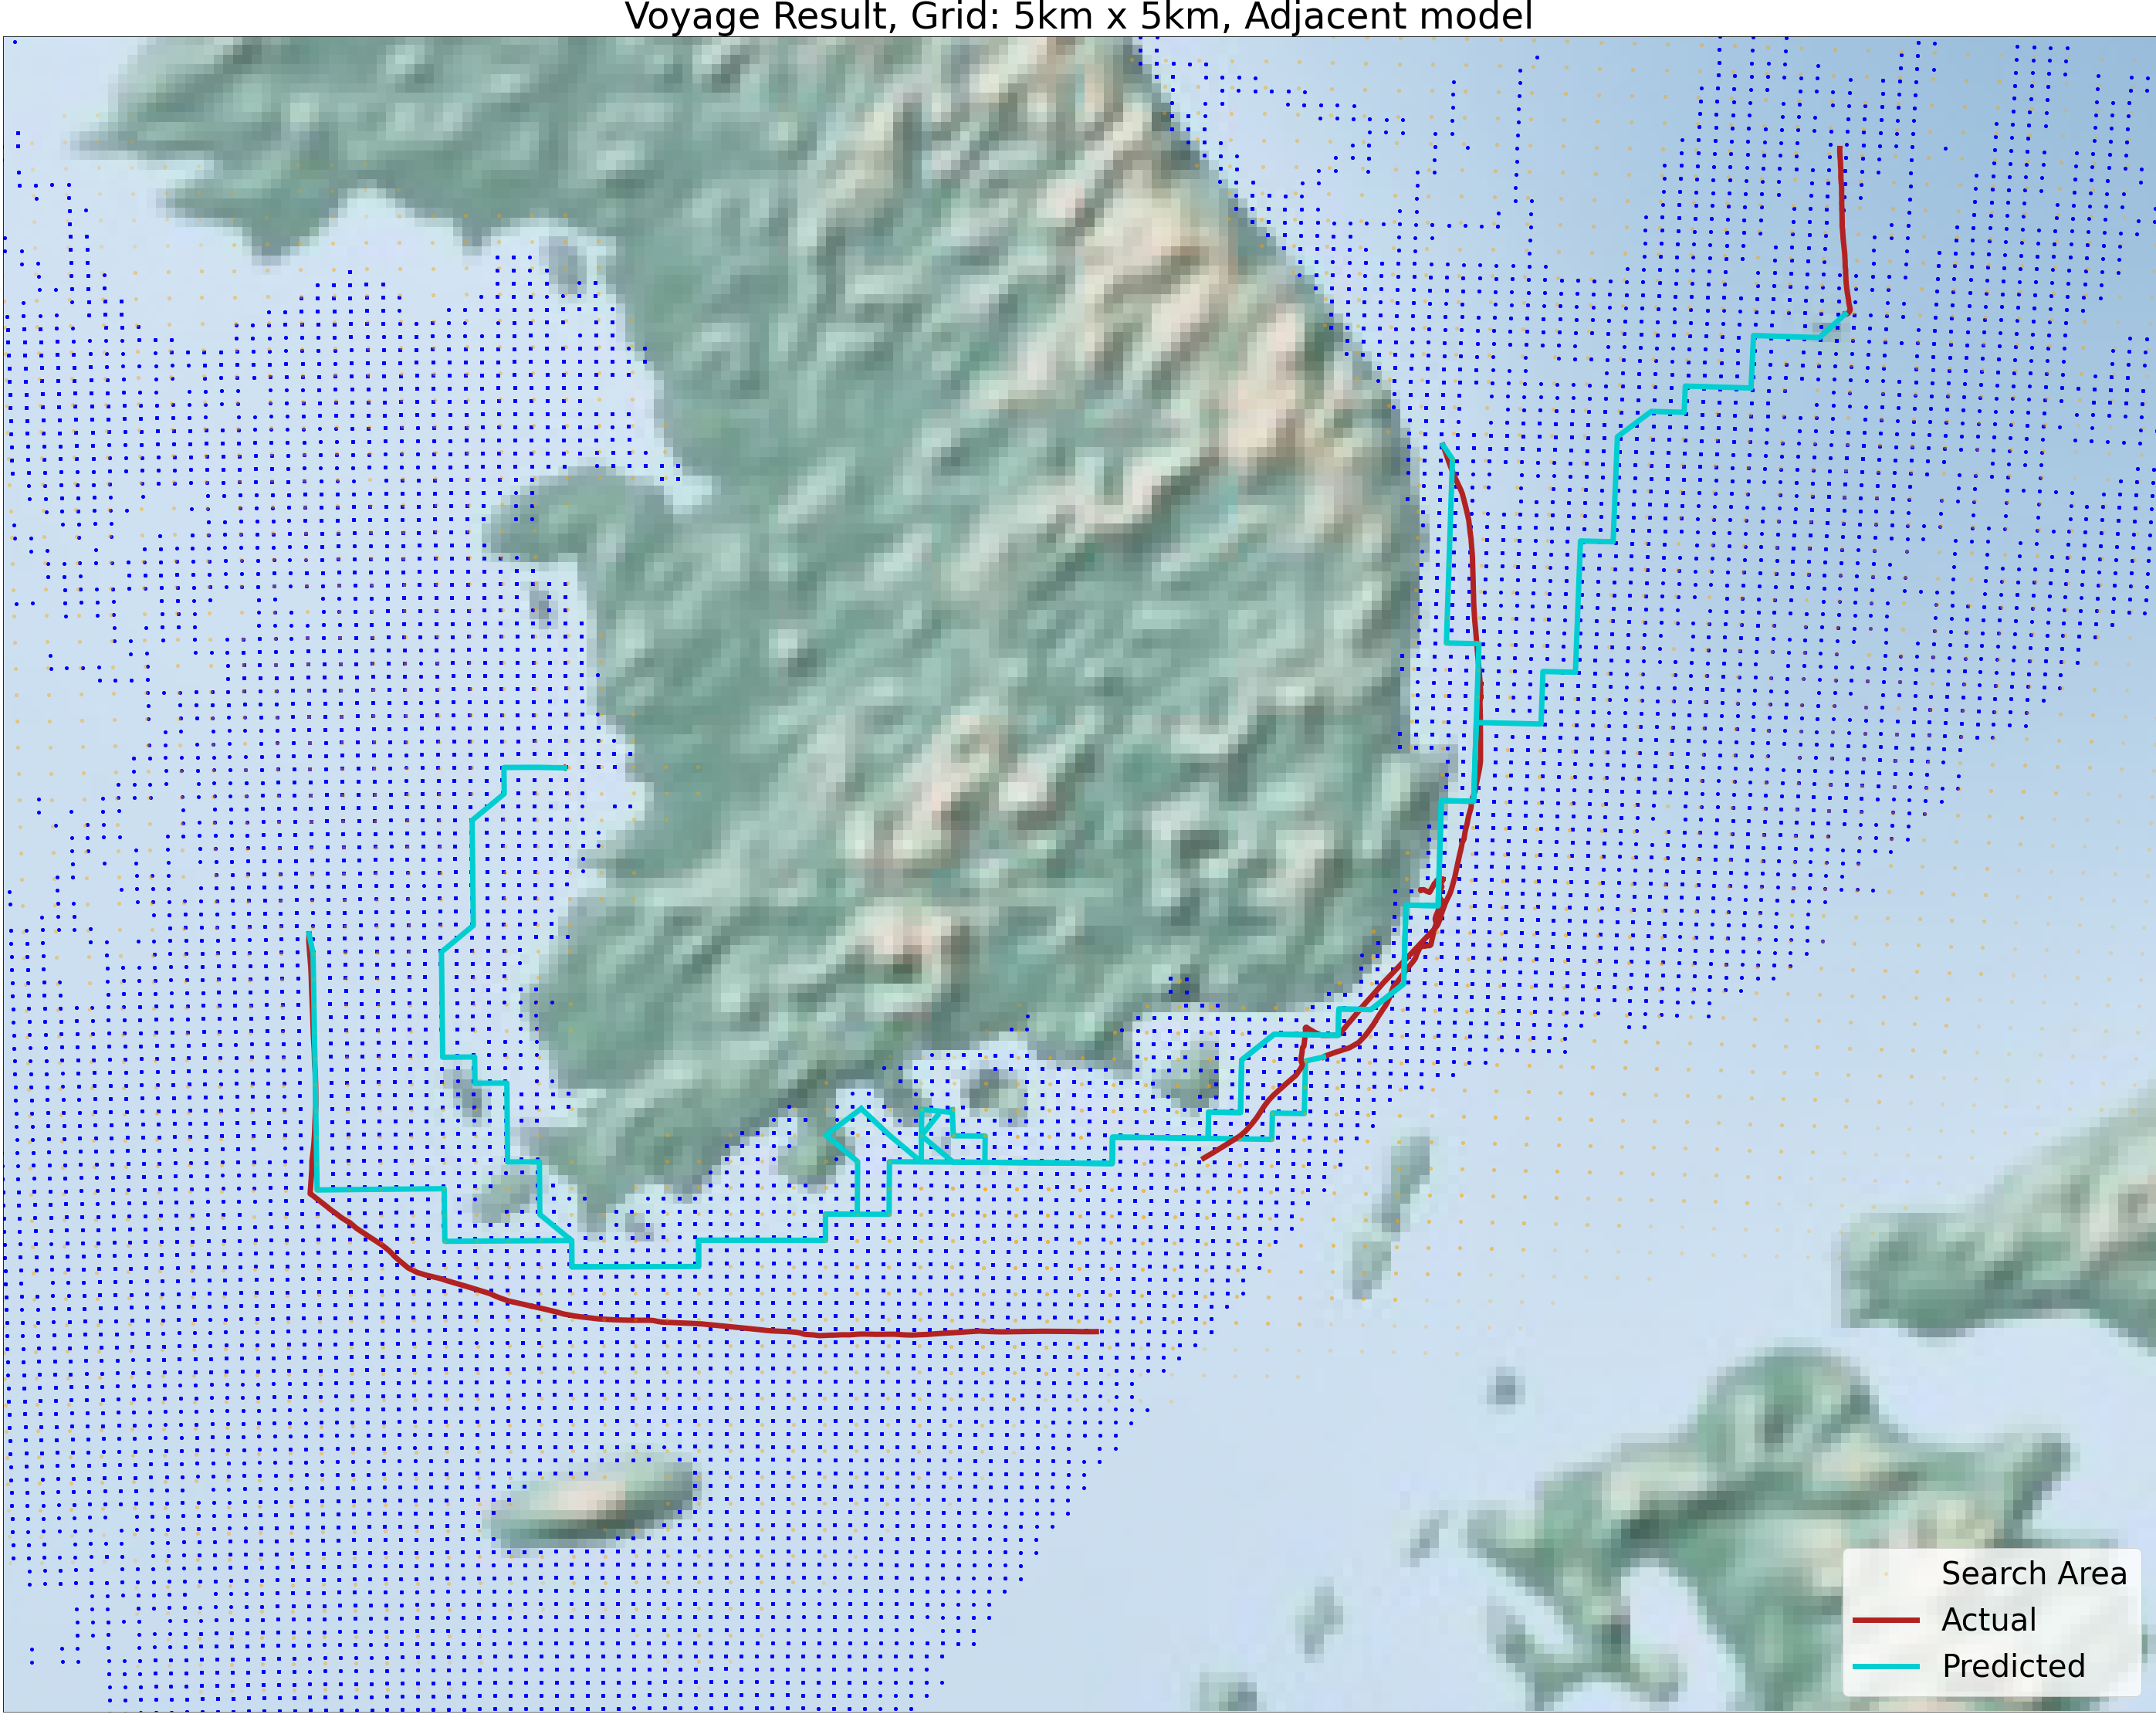

In [38]:
plot_result(traffic_model_lats, traffic_model_lons, routes_adjacent_5km, areas_adjacent_5km, test_voyages, 'Voyage Result, Grid: 5km x 5km, Adjacent model', 4, False, 0.3)

In [ ]:
# Predicting routes using the ship model 5km

importlib.reload(shortest_path)
graph_ship_5km.use_turn_penalty = False
graph_ship_5km.use_shallow_penalty = True
graph_ship_5km.use_dirways = False

%time routes_and_areas = shortest_path.predict_routes(summer_test_voyages.tail(5), grid_5km, graph_ship_5km, speed_model_5km, None, shallow_graph_5km)
routes_ship_model_5km = pd.DataFrame(data=routes_and_areas[0], columns=['lat', 'lon', 'node', 'speed', 'mmsi', 'voyage', 'start_time', 'number'])
areas_ship_model_5km = pd.DataFrame(data=routes_and_areas[1], columns=['lat', 'lon', 'voyage','g', 'h', 'f'])

In [ ]:
plot_result(traffic_model_lats, traffic_model_lons, routes_ship_model_5km, areas_ship_model_5km, test_voyages, 'Voyage Result, Grid: 5km x 5km, Ship model', 4, False, 0.3)

In [ ]:
# Predicting routes using the adjacent model 2500m

importlib.reload(shortest_path)
graph_adj_2500m.use_turn_penalty = False
graph_adj_2500m.use_shallow_penalty = True
graph_adj_2500m.use_dirways = False

%time routes_and_areas = shortest_path.predict_routes(summer_test_voyages.tail(5), grid_2500m, graph_adj_2500m, speed_model_2500m, None, shallow_graph_2500m)
routes_adjacent_2500m = pd.DataFrame(data=routes_and_areas[0], columns=['lat', 'lon', 'node', 'speed', 'mmsi', 'voyage', 'start_time', 'number'])
areas_adjacent_2500m = pd.DataFrame(data=routes_and_areas[1], columns=['lat', 'lon', 'voyage','g', 'h', 'f'])

In [ ]:
plot_result(traffic_model_lats, traffic_model_lons, routes_adjacent_2500m, areas_adjacent_2500m, test_voyages, 'Voyage Result, Grid: 2.5km x 2.5km, Adjacent model', 1.5, False, 0.3)

In [ ]:
# Predicting routes using the adjacent model 2500m

importlib.reload(shortest_path)
graph_ship_2500m.use_turn_penalty = False
graph_ship_2500m.use_shallow_penalty = True
graph_ship_2500m.use_dirways = False

%time routes_and_areas = shortest_path.predict_routes(summer_test_voyages.tail(5), grid_2500m, graph_ship_2500m, speed_model_2500m, None, shallow_graph_2500m)
routes_ship_model_2500m = pd.DataFrame(data=routes_and_areas[0], columns=['lat', 'lon', 'node', 'speed', 'mmsi', 'voyage', 'start_time', 'number'])
areas_ship_model_2500m = pd.DataFrame(data=routes_and_areas[1], columns=['lat', 'lon', 'voyage','g', 'h', 'f'])

In [ ]:
plot_result(traffic_model_lats, traffic_model_lons, routes_ship_model_2500m, areas_ship_model_2500m, test_voyages, 'Voyage Result, Grid: 2.5km x 2.5km, Ship model', 1.5, False, 0.3)

## load ais data

In [39]:
ko_ais = pd.read_csv("data/datasets/" +'ko_ais_test.csv', index_col=0, parse_dates = ['timestam'])
ais_moving = ko_ais[(ko_ais.speed > 0.1)]

/tmp/ipykernel_28660/539166050.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  ko_ais = pd.read_csv("data/datasets/" +'ko_ais_test.csv', index_col=0, parse_dates = ['timestam'])


## User Interface

In [40]:
from IPython import display as ipy_display
import ipywidgets as widgets
%matplotlib notebook

In [47]:
class User_Interface:
    def __init__(self, title, traffic_model_lats, traffic_model_lons, ais_moving, predict_routes, areas, test_voyages):
        self.traffic_model_visible = True
        self.generalized_route_visible = True
        self.expected_route_visible = True
        
        self.traffic_model_lats = traffic_model_lats
        self.traffic_model_lons = traffic_model_lons
        self.ais_moving = ais_moving
        self.predict_routes = predict_routes
        self.areas = areas
        self.test_voyages = test_voyages
        
        self.gate = []
        self.conge = []
        self.point = []
        self.coords = []
        
        self.fig, self.ax = plt.subplots(figsize=(15,15))
        plt.title(title)
        plt.rc('font', size=8)
        plt.autoscale(tight=True)
        
        m = Basemap(llcrnrlon = round(test_voyages.lon.min(), 2),
                    llcrnrlat = round(test_voyages.lat.min(), 2), 
                    urcrnrlon = round(test_voyages.lon.max(), 2), 
                    urcrnrlat = round(test_voyages.lat.max(), 2),
                    resolution='l')
#         m.drawcoastlines()
#         m.drawcountries()
#         m.fillcontinents(color='lightgreen')
#         m.drawmapboundary()
        
        m.shadedrelief()

        parallels = np.arange(round(test_voyages.lat.min(), 2), round(test_voyages.lat.max(), 2), 0.4)
        m.drawparallels(parallels, labels=[True,False,False,False])
        meridians = np.arange(round(test_voyages.lon.min(), 2), round(test_voyages.lon.max(), 2), 0.4)
        m.drawmeridians(meridians, labels=[True,False,False,True])
        
        return
        
    def draw_traffic_model(self, lats, lons, area_marker_size=4):
#         self.ax.plot(lons, lats, 'o', c='violet', alpha=0.5, markersize=area_marker_size)
        self.ax.plot(lons, lats, 'o', c='orange', alpha=1.0, markersize=area_marker_size)
        return
    
    def draw_vessel_route(self, ais_moving):
        xy = ais_moving.loc[:, ('lat', 'lon')]
        self.ax.plot(xy.loc[:, ('lon')], xy.loc[:, ('lat')], 'o', c='mediumblue', alpha=0.01, markersize=0.2)
        return
    
    def draw_prediction(self, routes, areas, test_voyages, area_marker_size=4, area_std=0.2):
        newLabels, newHandles = [], []
        routes_groupped = routes.groupby('mmsi')

        route_all = pd.DataFrame()
        for mmsi, route in routes_groupped:
            route_all = pd.concat([route_all, route])

            xy = areas[areas.voyage == mmsi].loc[:, ('lat', 'lon')]
            self.ax.plot(xy.loc[:, ('lon')], xy.loc[:, ('lat')], 'o', c='orange', alpha=0.4, markersize=area_marker_size, label='Search Area')

            xy = route.loc[:, ('lat', 'lon')]
            self.ax.plot(xy.loc[:, ('lon')], xy.loc[:, ('lat')], c='red', alpha=1, markersize=2.0, linewidth=2.0, label='Predicted', zorder=6)

            x_y_curve1 = route.loc[:, ('lon', 'lat')].values
            x_y_curve2 = test_voyages[(test_voyages.mmsi == mmsi)].loc[:, ('lon', 'lat')].values #these are your points for curve 2 (I just put some random numbers)
        return
    
    def draw_gate(self):
        return
    
    def set_visiblility(self, traffic_model_visible = True, generalized_route_visible = True, expected_route_visible = True):
        self.traffic_model_visible = traffic_model_visible
        self.generalized_route_visible = generalized_route_visible
        self.expected_route_visible = expected_route_visible
        return
    
    def onclick(self, event):
        if event.inaxes != self.ax:
            return
        
        if event.button == 1:
            ix, iy = event.xdata, event.ydata
            
            if len(self.coords) == 0:
                self.coords.append((ix, iy))
            elif str(type(self.coords[len(self.coords)-1][0])) != "<class 'tuple'>":
                self.coords[len(self.coords)-1] = (self.coords[len(self.coords)-1], (ix, iy))
                l = self.ax.plot([self.coords[len(self.coords)-1][0][0], self.coords[len(self.coords)-1][1][0]], 
                                 [self.coords[len(self.coords)-1][0][1], self.coords[len(self.coords)-1][1][1]], 
                                 c='gold', 
                                 alpha=1, 
                                 markersize=2.0, 
                                 linewidth=2.0, 
                                 label='Gate' + str(len(self.gate)+1),
                                 zorder=7)
                self.gate.append(l)
                
                
                conge = 0
                routes_groupped = self.predict_routes.groupby('mmsi')
                for mmsi, route in routes_groupped:
                    xy = route.loc[:, ('lat', 'lon')]
                    
                    for i in range(0, len(xy)-1):
                        result = self.is_cross_pt(self.coords[len(self.coords)-1][0][0],
                                                  self.coords[len(self.coords)-1][0][1],
                                                  self.coords[len(self.coords)-1][1][0],
                                                  self.coords[len(self.coords)-1][1][1],
                                                  xy['lon'].tolist()[i],
                                                  xy['lat'].tolist()[i],
                                                  xy['lon'].tolist()[i+1],
                                                  xy['lat'].tolist()[i+1])
                        
                        if result:
                            conge += 1
                            break
                self.conge.append(conge)
                
            else:
                self.coords.append((ix, iy))
                
            p = self.ax.scatter(ix, iy, c='gold', zorder=7)
            self.point.append(p)
            
        if event.button == 3:
            if len(self.point) % 2 == 1:
                self.point[len(self.point)-1].remove()
                del self.point[len(self.point)-1]
                del self.coords[len(self.coords)-1]
            
            else:
                self.gate[len(self.gate)-1].pop(0).remove()
                del self.gate[len(self.gate) -1]
                self.point[len(self.point)-1].remove()
                del self.point[len(self.point)-1]
                self.point[len(self.point)-1].remove()
                del self.point[len(self.point)-1]
                del self.coords[len(self.coords)-1]
                del self.conge[len(self.conge)-1]
    
    def is_divide_pt(self, x11, y11, x12, y12, x21, y21, x22, y22):
        f1 = (x12-x11)*(y21-y11) - (y12-y11)*(x21-x11)
        f2 = (x12-x11)*(y22-y11) - (y12-y11)*(x22-x11)
        if(f1*f2 < 0):
            return True
        return False
    
    def is_cross_pt(self, x11, y11, x12, y12, x21, y21, x22, y22):
        b1 = self.is_divide_pt(x11, y11, x12, y12, x21, y21, x22, y22)
        b2 = self.is_divide_pt(x21, y21, x22, y22, x11, y11, x12, y12)
        if(b1 and b2):
            return True
        return False
    
    
    def show(self, area_marker_size=10, area_std=0.2):
        ipy_display.clear_output(wait=True)
        if self.traffic_model_visible:
            self.draw_traffic_model(self.traffic_model_lats, self.traffic_model_lons, area_marker_size)
        if self.generalized_route_visible:
            self.draw_vessel_route(self.ais_moving)
        if self.expected_route_visible:
            self.draw_prediction(self.predict_routes, self.areas, self.test_voyages, area_marker_size, area_std)
        
        self.cid = self.fig.canvas.mpl_connect('button_press_event', self.onclick)
        plt.show()
        return
    
    

<IPython.core.display.Javascript object>


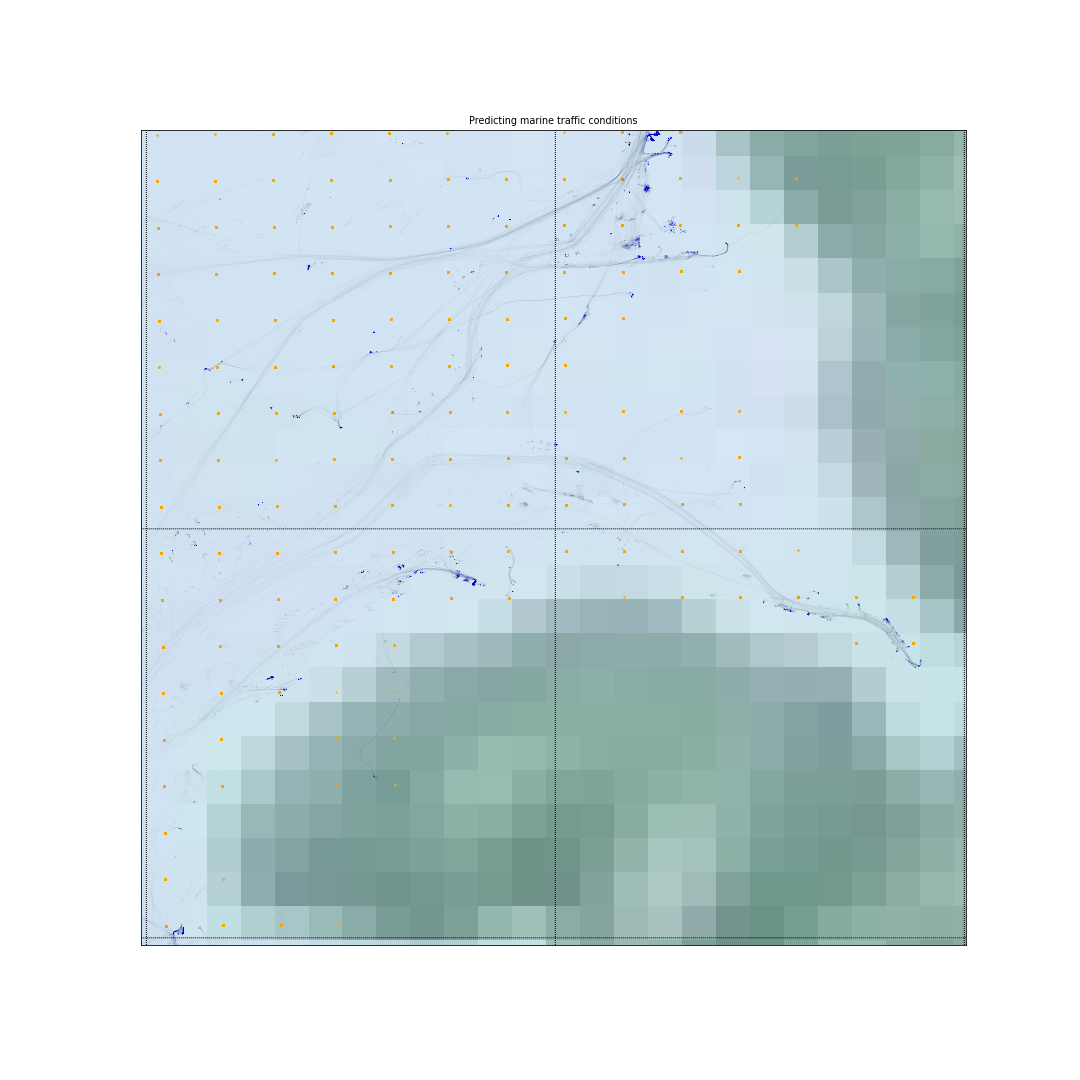

In [49]:
# @widgets.interact_manual()
# def plot(traffic_model = True, generalized_route = True, expected_route = True):
#     interface = User_Interface('Predicting marine traffic conditions', test_voyages)
#     interface.set_visiblility(traffic_model, generalized_route, expected_route)
#     interface.show(traffic_model_lats, traffic_model_lons, ais_moving, routes_adjacent_5km, areas_adjacent_5km, test_voyages, 0.5, 0.3)

traffic_model = True
generalized_route = True
expected_route = False

interface = User_Interface('Predicting marine traffic conditions', traffic_model_lats, traffic_model_lons, ais_moving, routes_adjacent_5km, areas_adjacent_5km, test_voyages)
interface.set_visiblility(traffic_model, generalized_route, expected_route)
interface.show(1, 0.3)

In [276]:
interface.coords

[((126.13440882091456, 35.9549223781572),
  (126.33154143740201, 35.82051377600666)),
 ((126.03584251267083, 35.63234173299591),
  (126.2688174230651, 35.64130230647262)),
 ((126.31362029044861, 34.27033456453713),
  (126.48387118650595, 34.41370374016437)),
 ((127.64874573847729, 34.74524495880236),
  (127.92652351625506, 34.5122700484081)),
 ((129.56630846249163, 36.23270015593498),
  (129.75448050550239, 36.03556753944753)),
 ((130.5250898244988, 37.415495854859714),
  (130.69534072055615, 37.3617324139995))]

In [277]:
interface.conge

[1, 1, 2, 3, 2, 1]